In [5]:
import os
import json
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import text_wrangler

In [3]:
os.chdir('..')
os.chdir('..')

In [4]:
pwd

'D:\\springboard\\capstone\\springboard-capstone-project\\app'

## Sentiment data

In [87]:
# Read data
sent = pd.read_csv('data/sent/all-data.csv', encoding="ISO-8859-1", header=None)
sent.columns = ['sent', 'headline']

In [88]:
texts = sent.headline.copy()
texts = texts.str.replace(" '", "'")
texts = texts.str.replace(" n't", "n't")
texts = texts.str.replace("'s ", " ")
texts = text_wrangler.preprocess_texts(texts)

In [89]:
texts

0       accord Gran company no plan move production Ru...
1       Technopolis plan develop stage area no less sq...
2       international electronic industry company Elco...
3       new production plant company would increase ca...
4       accord company update strategy year Basware ta...
                              ...                        
4841    LONDON MarketWatch Share price end lower Londo...
4842    Rinkuskiai beer sale fall per cent million lit...
4843    operate profit fall EUR mn EUR mn include vess...
4844    net sale Paper segment decrease EUR mn second ...
4845    sale Finland decrease January sale outside Fin...
Name: headline, Length: 4846, dtype: object

In [90]:
sent['headline_clean'] = texts

In [22]:
num_words = 2000
max_len = 25
train_padded, word_index = text_wrangler.encode_text_into_sequence(texts, num_words, max_len)

In [92]:
# Target
target = sent.sent.map({'positive': 1, 'neutral': 0, 'negative': -1})
sent_encoded = pd.concat((target, pd.DataFrame(train_padded)), axis=1)

In [94]:
sent_encoded

,sent,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,0,59,1,3,178,74,352,52,95,1,...,0,0,0,0,0,0,0,0,0,0
1,0,655,74,94,922,82,178,923,498,1272,...,924,445,4,0,0,0,0,0,0,0
2,-1,214,154,75,3,273,460,757,97,925,...,1,140,758,687,1,39,0,0,0,0
3,1,19,52,40,3,83,25,184,688,49,...,204,1273,25,52,926,0,0,0,0,0
4,1,59,3,1004,282,13,227,166,427,10,...,10,7,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4841,-1,578,1,9,67,89,559,578,612,1,...,1168,0,0,0,0,0,0,0,0,0
4842,0,1,403,7,121,54,291,8,1175,1,...,8,1175,0,0,0,0,0,0,0,0
4843,-1,27,11,121,2,5,2,5,28,584,...,0,0,0,0,0,0,0,0,0,0
4844,-1,10,7,86,371,90,2,5,102,22,...,459,685,342,60,2,5,2,5,0,0


In [95]:
sent.to_csv('data/sent/data_clean.csv', index=False)
sent_encoded.to_csv('data/sent/data_encoded.csv', index=False)
with open("data/sent/word_index.json", "w") as outfile:
    json.dump(word_index, outfile)

## NYT data

In [6]:
nyt = pd.read_csv('data/nyt/nyt.csv', encoding="ISO-8859-1")

In [7]:
nyt.headline

0        Addenda: Whitehall Parts Ways With Young & Rub...
1                A Famous $35 Emblem Put to Charitable Use
2                    Masius Is Enlarging Its New York Shop
3               Sara Lee Apparel Unit Selects a New Agency
4                                  World Business Briefing
                               ...                        
80200    Gates Foundation commits more than $2 billion ...
80201    Iranian Disinformation Effort Went Small to St...
80202    Amazon says the new F.T.C. chair, Lina Khan, s...
80203    Didi, the Chinese Ride-Hailing Giant, Makes It...
80204    An NFT of the World Wide Web sells for $5.4 mi...
Name: headline, Length: 80205, dtype: object

In [8]:
nyt.snippet

0        The Whitehall-Robins Healthcare division of th...
1        In 1971, Philip H. Knight asked Carolyn Davids...
2        D'Arcy Masius Benton & Bowles is expanding the...
3                Sara Lee Apparel Unit Selects a New Agenc
4        EUROPESWITZERLAND: PATENT APPEAL The Swiss dig...
                               ...                        
80200    The foundation noted that women had been dispr...
80201    The effort, targeting activists in Israel, was...
80202    Amazon said that if Ms. Khan played a role in ...
80203    The company is going public as investors conti...
80204    The source code to an early implementation of ...
Name: snippet, Length: 80205, dtype: object

In [9]:
nyt.loc[nyt.snippet == nyt.headline]

,web_url,pub_date,organizations,subjects,headline,snippet
105,https://www.nytimes.com/2001/09/11/business/wo...,2001-09-11T05:00:00+0000,Corus Group Plc,"Computer Chips | Debating | Suspensions, Dismi...",World Business Briefing,World Business Briefing
111,https://www.nytimes.com/2001/09/14/business/wo...,2001-09-14T05:00:00+0000,American International Group Incorporated | Am...,Insurance | AIRLINES AND AIRPLANES | Railroads...,World Business Briefing,World Business Briefing
125,https://www.nytimes.com/2001/09/19/business/wo...,2001-09-19T05:00:00+0000,Bayern Munich,APPAREL | Company Reports | Terrorism | Merger...,World Business Briefing,World Business Briefing
131,https://www.nytimes.com/2001/09/21/business/wo...,2001-09-21T05:00:00+0000,Vodafone Group Plc,AIRLINES AND AIRPLANES | Banks and Banking | T...,World Business Briefing,World Business Briefing
139,https://www.nytimes.com/2001/09/25/business/wo...,2001-09-25T05:00:00+0000,Concert,Interest Rates | Banks and Banking | AIRLINES ...,World Business Briefing,World Business Briefing
...,...,...,...,...,...,...
510,https://www.nytimes.com/2002/02/26/business/wo...,2002-02-26T05:00:00+0000,Financial Times,Budgets and Budgeting | Banks and Banking | In...,World Business Briefing,World Business Briefing
515,https://www.nytimes.com/2002/02/27/business/wo...,2002-02-27T05:00:00+0000,Pacific Century CyberWorks,Company Reports | Cellular Telephones | Recess...,World Business Briefing,World Business Briefing
524,https://www.nytimes.com/2002/04/03/business/wo...,2002-04-03T05:00:00+0000,Marks & Spencer Limited,Executives and Management | Oil (Petroleum) an...,World Business Briefing,World Business Briefing
528,https://www.nytimes.com/2002/04/05/business/me...,2002-04-05T05:00:00+0000,Infogrames Incorporated,Executives and Management | ADVERTISING | Appo...,Infogrames to McCarthy Mambro Bertino,Infogrames to McCarthy Mambro Bertino


In [10]:
nyt.shape

(80205, 6)

In [11]:
nyt = nyt.loc[~(nyt.headline == nyt.snippet)]

In [12]:
nyt.shape

(80119, 6)

In [13]:
nyt['text'] = nyt.headline.fillna('') + ' ' + nyt.snippet.fillna('')
nyt['text'] = nyt.text.str.replace("World Business Briefing", "")
nyt = nyt.loc[~(nyt.text == '')]

In [14]:
nyt.text.str.contains("World Business Briefing").sum()

0

In [15]:
nyt.shape

(80119, 7)

In [16]:
nyt.headline.head(5).map(print);

Addenda: Whitehall Parts Ways With Young & Rubicam
A Famous $35 Emblem Put to Charitable Use
Masius Is Enlarging Its New York Shop
Sara Lee Apparel Unit Selects a New Agency
World Business Briefing


In [17]:
nyt.snippet.head(5).map(print);

The Whitehall-Robins Healthcare division of the American Home Products Corporation ( news/quote ) said yesterday that it had unexpectedly ended its relationship with the New York office of Young & Rubicam Advertising, part of the Young & Rubicam u...
In 1971, Philip H. Knight asked Carolyn Davidson to create a logo for an athletic shoe company he was trying to start
D'Arcy Masius Benton & Bowles is expanding the New York office of Masius, its marketing unit for corporate, business-to-business and financial services
Sara Lee Apparel Unit Selects a New Agenc
EUROPESWITZERLAND: PATENT APPEAL The Swiss digital televi sion technology group, Kudelski, said that it would appeal a Delaware court ruling requiring it to pay $15 million to IPPV Enterprises for violating its patent rights. The court said Nagrav...


In [18]:
nyt.text.head(5).map(print);

Addenda: Whitehall Parts Ways With Young & Rubicam The Whitehall-Robins Healthcare division of the American Home Products Corporation ( news/quote ) said yesterday that it had unexpectedly ended its relationship with the New York office of Young & Rubicam Advertising, part of the Young & Rubicam u...
A Famous $35 Emblem Put to Charitable Use In 1971, Philip H. Knight asked Carolyn Davidson to create a logo for an athletic shoe company he was trying to start
Masius Is Enlarging Its New York Shop D'Arcy Masius Benton & Bowles is expanding the New York office of Masius, its marketing unit for corporate, business-to-business and financial services
Sara Lee Apparel Unit Selects a New Agency Sara Lee Apparel Unit Selects a New Agenc
 EUROPESWITZERLAND: PATENT APPEAL The Swiss digital televi sion technology group, Kudelski, said that it would appeal a Delaware court ruling requiring it to pay $15 million to IPPV Enterprises for violating its patent rights. The court said Nagrav...


In [19]:
texts = nyt.text.copy()

In [22]:
t0 = dt.datetime.now()
texts = text_wrangler.preprocess_texts(texts)
print(dt.datetime.now() - t0)

Lowering case
Fixing contractions
Removing accents
Removing special characters
Lemmatizing
Removing stop words
0:15:47.948613


In [23]:
texts.head(2).map(print);

addenda whitehall part way young rubicam whitehallrobins healthcare division american home products corporation newsquote say yesterday unexpectedly end relationship new york office young rubicam advertising part young rubicam
famous emblem put charitable use philip h knight ask carolyn davidson create logo athletic shoe company try start


In [24]:
texts = texts.map(lambda x: x.lower())

In [25]:
nyt['text_clean'] = texts

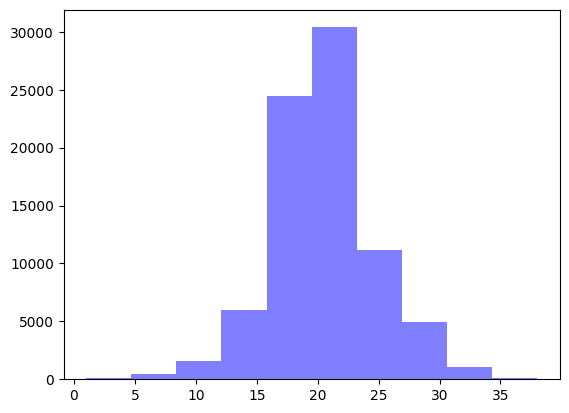

In [26]:
plt.hist(nyt.text_clean.map(lambda x: len(x.split())), color='blue', alpha=0.5)
plt.show()

In [27]:
num_words = 3000
max_len = 30
train_padded, word_index = text_wrangler.encode_text_into_sequence(texts, num_words, max_len)

In [28]:
train_padded[:5]

array([[   1,    1,  144,  102,  566,    1,    1,    1,  684,   65,  161,
           1,  355,    1,    2, 1758, 2951,   88, 1215,    4,   67,  349,
         566,    1,  314,  144,  566,    1,    0,    0],
       [2782,    1,  185,    1,   33,    1, 1259,    1,  348,    1,    1,
         172, 2814,    1, 2403,    3,   90,  143,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   1,    1,    4,   67, 1084,    1,    1,    1,    1,  255,    4,
          67,  349,    1,  534,  147,  307,    1,   23,   44,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   1, 1887, 2064,  147, 1789,    4,  173,    1, 1887, 2064,  147,
        1789,    4,    1,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0],
       [   1,  687,  578,  651,  217,    1,    1,   92,   32,    1,    2,
          11,  578,    1,  117,  747,  520,   29,    9,    1, 2117, 1107,
         687,  376,  117,    2, 

In [29]:
#texts_back = pd.DataFrame(train_padded).apply(lambda x: ' '.join(list(x.map({v: k for k, v in word_index.items()}).fillna(''))), axis=0)
rows = 5
texts_back = pd.DataFrame(train_padded).iloc[:rows].apply(lambda x: x.map({v: k for k, v in word_index.items()}).fillna(''), axis=1)

In [30]:
texts_back

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,<UNK>,<UNK>,part,way,young,<UNK>,<UNK>,<UNK>,division,american,...,york,office,young,<UNK>,advertising,part,young,<UNK>,,
1,famous,<UNK>,put,<UNK>,use,<UNK>,h,<UNK>,ask,<UNK>,...,,,,,,,,,,
2,<UNK>,<UNK>,new,york,shop,<UNK>,<UNK>,<UNK>,<UNK>,expand,...,,,,,,,,,,
3,<UNK>,lee,apparel,unit,select,new,agency,<UNK>,lee,apparel,...,,,,,,,,,,
4,<UNK>,patent,appeal,swiss,digital,<UNK>,<UNK>,technology,group,<UNK>,...,enterprise,violate,patent,right,court,say,<UNK>,,,


In [31]:
texts.head(rows).map(print);

addenda whitehall part way young rubicam whitehallrobins healthcare division american home products corporation newsquote say yesterday unexpectedly end relationship new york office young rubicam advertising part young rubicam
famous emblem put charitable use philip h knight ask carolyn davidson create logo athletic shoe company try start
masius enlarge new york shop darcy masius benton bowles expand new york office masius marketing unit corporate businesstobusiness financial service
sara lee apparel unit select new agency sara lee apparel unit select new agenc
europeswitzerland patent appeal swiss digital televi sion technology group kudelski say would appeal delaware court ruling require pay million ippv enterprise violate patent right court say nagrav


In [32]:
texts_back.head(rows).apply(lambda x: ' '.join(x), axis=1).map(print);

<UNK> <UNK> part way young <UNK> <UNK> <UNK> division american home <UNK> corporation <UNK> say yesterday unexpectedly end relationship new york office young <UNK> advertising part young <UNK>  
famous <UNK> put <UNK> use <UNK> h <UNK> ask <UNK> <UNK> create logo <UNK> shoe company try start            
<UNK> <UNK> new york shop <UNK> <UNK> <UNK> <UNK> expand new york office <UNK> marketing unit corporate <UNK> financial service          
<UNK> lee apparel unit select new agency <UNK> lee apparel unit select new <UNK>                
<UNK> patent appeal swiss digital <UNK> <UNK> technology group <UNK> say would appeal <UNK> court ruling require pay million <UNK> enterprise violate patent right court say <UNK>   


In [33]:
nyt_encoded = pd.DataFrame(train_padded)

In [34]:
nyt_encoded

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1,1,144,102,566,1,1,1,684,65,...,67,349,566,1,314,144,566,1,0,0
1,2782,1,185,1,33,1,1259,1,348,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,4,67,1084,1,1,1,1,255,...,0,0,0,0,0,0,0,0,0,0
3,1,1887,2064,147,1789,4,173,1,1887,2064,...,0,0,0,0,0,0,0,0,0,0
4,1,687,578,651,217,1,1,92,32,1,...,2117,1107,687,376,117,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80114,1,1523,2182,6,2251,1,135,1523,941,439,...,0,0,0,0,0,0,0,0,0,0
80115,1,1,135,78,178,649,19,2998,1,135,...,1,1,75,0,0,0,0,0,0,0
80116,242,2,4,1711,2851,1,1,1,310,242,...,37,2722,73,2555,376,1478,898,0,0,0
80117,1,197,2402,99,12,955,83,121,3,78,...,69,1273,660,197,1,0,0,0,0,0


In [35]:
for i, (k, v) in enumerate(word_index.items()):
    print(k, v)
    if i > 5:
        break

<UNK> 1
say 2
company 3
new 4
bank 5
billion 6
year 7


In [36]:
nyt.to_csv('data/nyt/data_clean.csv', index=False)
nyt_encoded.to_csv('data/nyt/data_encoded.csv', index=False)
with open("data/nyt/word_index.json", "w") as outfile:
    json.dump(word_index, outfile)

## References

A Practitioner's Guide to Natural Language Processing (Part I) — Processing & Understanding Text  
https://towardsdatascience.com/a-practitioners-guide-to-natural-language-processing-part-i-processing-understanding-text-9f4abfd13e72

NLP – Expand contractions in Text Processing  
https://www.geeksforgeeks.org/nlp-expand-contractions-in-text-processing/

Text Normalization for Natural Language Processing (NLP)  
https://towardsdatascience.com/text-normalization-for-natural-language-processing-nlp-70a314bfa646

A hands-on intuitive approach to Deep Learning Methods for Text Data — Word2Vec, GloVe and FastText  
https://towardsdatascience.com/understanding-feature-engineering-part-4-deep-learning-methods-for-text-data-96c44370bbfa

Tokenization and Text Data Preparation with TensorFlow & Keras  
https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html